In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
df_data = pd.read_csv("../Data/preprocessed_alcohol_balance_perperson.csv")
# display(df_data)
print(list(df_data))
print(df_data.shape)

['Conditie', 'SubjectID', 'Height', 'Weight', 'Age', 'BMI', 'Alcohol', 'Alcohol_Class', 'Balance_MLrange', 'Balance_MLstdev', 'Balance_MLmeanVelocity', 'Balance_APrange', 'Balance_APstdev', 'Balance_APmeanVelocity', 'Balance_MeanVelocity', 'GaitVelocity', 'MovementVelocity', 'std_SegmentData', 'mad_SegmentData', 'mean_StepLength', 'Velocity']
(308, 21)


In [38]:
df_data = df_data[df_data.Conditie == "norm"]
print(df_data.shape)

(154, 21)


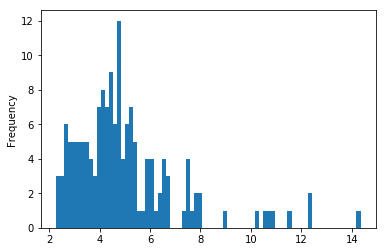

In [39]:
df_data = df_data.sort_values("Balance_MeanVelocity")
df_data["Balance_MeanVelocity"].plot.hist(bins=75)

In [55]:
df_data["Balance_MeanVelocity_Classes"] = pd.qcut(df_data['Balance_MeanVelocity'], 2, labels=[1, 0])
df_data["Balance_MeanVelocity_Classes"].plot

In [56]:
df_data = df_data.sort_values("SubjectID")

In [58]:
display(df_data)
df_new.to_csv(path_or_buf="../Data/preprocessed_balance_perperson_nobril.csv", index=False)

,Conditie,SubjectID,Height,Weight,Age,BMI,Alcohol,Alcohol_Class,Balance_MLrange,Balance_MLstdev,...,Balance_APstdev,Balance_APmeanVelocity,Balance_MeanVelocity,GaitVelocity,MovementVelocity,std_SegmentData,mad_SegmentData,mean_StepLength,Velocity,Balance_MeanVelocity_Classes
0,norm,6,177,70.0,20,22.343516,0.00,0,10.421641,2.753424,...,2.367358,2.674099,4.725911,1.175792,1.187491,0.051247,0.040761,0.664377,2.191667,0
2,norm,9,195,86.0,23,22.616700,0.00,0,12.458077,2.611063,...,1.077709,1.763952,5.022392,1.114992,1.121095,0.022745,0.019538,0.700817,2.241667,0
4,norm,10,165,65.0,28,23.875115,0.00,0,10.540746,2.647560,...,0.860375,1.478939,4.189830,0.822858,0.855915,0.106283,0.095379,0.516998,3.133333,1
6,norm,11,179,68.0,25,21.222808,0.00,0,11.943232,3.523579,...,1.327192,2.224658,4.336345,0.989439,1.000792,0.021762,0.018467,0.586470,2.508333,1
8,norm,13,168,70.0,18,24.801587,0.00,0,11.288707,3.137366,...,1.759603,2.440945,4.825908,1.049215,1.053802,0.025560,0.020575,0.639974,2.383333,0
10,norm,14,165,55.0,20,20.202020,0.00,0,10.846417,3.155953,...,1.417053,1.927871,4.469692,1.129709,1.134625,0.025017,0.020754,0.605904,2.258333,1
12,norm,15,176,65.0,13,20.983988,0.00,0,21.610675,6.148515,...,3.031796,7.778655,10.786251,1.188127,1.204380,0.034557,0.030307,0.718547,2.125000,0
14,norm,16,175,64.0,25,20.897959,0.00,0,9.828302,2.556148,...,1.590459,2.122586,3.746139,1.202106,1.211136,0.018895,0.015832,0.611920,2.125000,1
16,norm,17,190,80.0,27,22.160665,0.00,0,16.902920,4.774991,...,3.145196,2.157807,5.420258,1.070075,1.085942,0.067241,0.058849,0.698422,2.383333,0
18,norm,18,179,72.0,28,22.471209,0.00,0,8.120713,2.110536,...,1.001097,1.058665,3.910137,1.293483,1.300594,0.026756,0.021141,0.718495,1.966667,1


NameError: name 'df_new' is not defined